In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/dacon_anomaly')

In [ ]:
def load_data():
    train = pd.read_csv('./data/train.csv')
    valid = pd.read_csv('./data/val.csv')
    test = pd.read_csv('./data/test.csv')

    return train, valid, test

train, valid, test = load_data()

In [ ]:
test

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0x4587f,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0.028645,1.034904
142499,0x45880,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0.810312,1.034916
142500,0x45884,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,1.034963
142501,0x45885,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,1.034975


In [ ]:
def preprocess(train, valid, test):
    train.drop(['ID'], inplace = True, axis = 1)
    valid.drop(['ID'], inplace = True, axis = 1)
    test.drop(['ID'], inplace = True, axis = 1)

    X_train = train.values
    X_valid = valid.drop(['Class'], axis = 1).values
    y_valid = valid['Class'].values
    X_test = test.values

    return X_train, X_valid, y_valid, X_test

X_train, X_valid, y_valid, X_test = preprocess(train, valid, test)

### 신현호 - Baseline

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import argparse
from tqdm import tqdm
import random
from itertools import product
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed) 
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = True

set_seed(123)

### Auto Encoder

##### Train

In [ ]:
class AutoEncoder(nn.Module):

    def __init__(self, input_size, encoder_hidden_size, bottle_neck_size, decoder_hidden_size, dropout_p):
        self.input_size = input_size
        self.encoder_hidden_size = encoder_hidden_size
        self.bottle_neck_size = bottle_neck_size
        self.decoder_hidden_size = decoder_hidden_size
        self.dropout_p = dropout_p

        super(AutoEncoder, self).__init__()


        # ===== Encoder ===== #
        self.encoder = nn.ModuleList()
        # input layer
        self.encoder.append(nn.Sequential(
            nn.Linear(input_size, encoder_hidden_size[0]),
            nn.BatchNorm1d(encoder_hidden_size[0]),
            nn.ReLU(),
            nn.Dropout(dropout_p)
        ))
        # encoder hidden layers
        for idx in range(len(encoder_hidden_size) - 1):
            self.encoder.append(nn.Sequential(
                nn.Linear(encoder_hidden_size[idx], encoder_hidden_size[idx + 1]),
                nn.BatchNorm1d(encoder_hidden_size[idx + 1]),
                nn.ReLU(),
                nn.Dropout(dropout_p)
            ))
        # bottle neck layer
        self.encoder.append(nn.Sequential(
            nn.Linear(encoder_hidden_size[-1], bottle_neck_size),
            nn.BatchNorm1d(bottle_neck_size),
            nn.ReLU(),
            nn.Dropout(dropout_p)
        ))


        # ===== Decoder ===== #
        self.decoder = nn.ModuleList()
        # bottle neck
        self.decoder.append(nn.Sequential(
            nn.Linear(bottle_neck_size, decoder_hidden_size[0]),
            nn.BatchNorm1d(decoder_hidden_size[0]),
            nn.ReLU(),
            nn.Dropout(dropout_p)
        ))
        # decoder hidden layers
        for idx in range(len(decoder_hidden_size) - 1):
            self.decoder.append(nn.Sequential(
                nn.Linear(decoder_hidden_size[idx], decoder_hidden_size[idx + 1]),
                nn.BatchNorm1d(decoder_hidden_size[idx + 1]),
                nn.ReLU(),
                nn.Dropout(dropout_p)
            ))
        # output_layer
        self.decoder.append(nn.Linear(decoder_hidden_size[-1], input_size))


    def forward(self, x):
        # |x| = (batch_size, input_size)
        for layer in self.encoder:
            x = layer(x)
        
        latent = x
        # |latent| = (batch_size, bottle_neck_size)

        for layer in self.decoder:
            x = layer(x)
        # |x| = (batch_size, input_size)

        return x

In [ ]:
class AE_Dataset(Dataset):

    def __init__(self, x):
        self.x = x
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx]


def get_loader(train, valid, batch_size, shuffle = True):
    train_loader = DataLoader(
        AE_Dataset(train),
        batch_size = batch_size,
        shuffle = shuffle
    )
    valid_loader = DataLoader(
        AE_Dataset(valid),
        batch_size = batch_size,
        shuffle = False
    )    

    return train_loader, valid_loader

In [ ]:
class Trainer():

    def __init__(self, model, crit, optimizer, device):
        self.model = model
        self.crit = crit
        self.optimizer  = optimizer
        self.device = device

        self.best_model = None
        self.best_f1 = -np.inf
        self.best_epoch = None

    def _train_epoch(self, epoch, train_loader):
        losses = []
        for batch in train_loader:
            x = batch.float()
            x = x.to(self.device)

            # initialize optimizer
            self.optimizer.zero_grad()

            # feed forward
            x_hat = self.model(x)

            # loss
            loss = self.crit(x, x_hat)

            # backpropagation
            loss.backward()

            # gradient descent
            self.optimizer.step()
            
            losses.append(float(loss))

        epoch_loss = np.mean(losses)
        
        return epoch_loss
    
    def _valid_epoch(self, epoch, valid_loader, y_valid, thres):
        val_losses = []
        cos_sims = []
        cos = nn.CosineSimilarity(dim = 1, eps=1e-6)
        for batch in valid_loader:
            x = batch.float()
            x = x.to(self.device)

            self.model.eval()
            with torch.no_grad():
                # feed foward
                x_hat = self.model(x)

                # cosine similarity
                cos_sim = cos(x, x_hat)
                cos_sims.append(cos_sim)

                # loss
                val_loss = self.crit(x, x_hat)

                val_losses.append(float(val_loss))
            
        epoch_val_loss = np.mean(val_losses)

        cos_sims = torch.cat(cos_sims).detach().cpu().numpy()
        pred = np.where(cos_sims >= thres, 0, 1)
        f1 = f1_score(y_valid, pred, average = 'macro')

        return epoch_val_loss, f1

    def train(self, train_loader, valid_loader, y_valid, threshold = 0.95, n_epochs = 1, early_stop = 20, load_best_model = True, verbose = 1):
        early_stopped = False
        train_losses = []
        valid_losses = []
        with tqdm(range(1, n_epochs + 1), desc = '*** Training ***') as pbar:
            for epoch in pbar:
                # train one epoch
                train_loss = self._train_epoch(epoch, train_loader)
                # valid one epoch
                valid_loss, f1 = self._valid_epoch(epoch, valid_loader, y_valid, threshold)

                train_losses += [train_loss]
                valid_losses += [valid_loss]
                
                pbar.set_postfix({
                    'Epoch' : epoch,
                    'Loss' : np.round(train_loss, 5),
                    'Val_Loss' : np.round(valid_loss, 5),
                    'f1' : np.round(f1, 5)
                })

                if self.best_f1 < f1:
                    self.best_f1 = f1
                    self.best_model = self.model.state_dict()
                    self.best_epoch = epoch

                if epoch - self.best_epoch > early_stop:
                    early_stopped = epoch
                    print('********* Early Stop *********')
                    break

        if load_best_model:
            self.model.load_state_dict(self.best_model)

        if verbose >= 1:
            fig, ax = plt.subplots()
            fig.set_size_inches(8,5)
            x_range = range(1, early_stopped + 1) if early_stopped else range(1, n_epochs + 1)
            ax.plot(x_range, train_losses, color = 'dodgerblue', label = 'Train Loss')
            ax.plot(x_range, valid_losses, color = 'limegreen', label = 'Validation Loss')
            ax.set_facecolor('w')
            ax.set_title('Leaning Curve', fontsize = 20)
            ax.set_xlabel('Epoch', fontsize = 15)
            ax.set_ylabel('Loss', fontsize = 15)
            ax.grid(True, axis = 'y', color = 'silver')
            ax.spines['bottom'].set_color('k')
            ax.legend()
            plt.show()

In [ ]:
def get_crit(loss = 'mse', huber_delta = .5):
    if loss.lower() == 'mse':
        crit = nn.MSELoss()
    
    elif loss.lower() == 'mae':
        crit = nn.L1Loss()

    elif loss.lower() == 'huber':
        crit = nn.HuberLoss(delta = huber_delta)

    return crit

def main(hyper_params):
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = AutoEncoder(
    input_size = hyper_params.input_size,
    encoder_hidden_size = hyper_params.encoder_hidden_size,
    bottle_neck_size = hyper_params.bottle_neck_size,
    decoder_hidden_size = hyper_params.decoder_hidden_size,
    dropout_p = hyper_params.dropout_p
    )
    model.to(DEVICE)

    train_loader, valid_loader = get_loader(
    X_train,
    X_valid,
    batch_size = hyper_params.batch_size,
    shuffle = True
    )

    optimizer = optim.Adam(model.parameters())
    crit = get_crit(loss = hyper_params.loss)

    trainer = Trainer(
        model,
        crit,
        optimizer,
        DEVICE
    )
    trainer.train(train_loader, valid_loader, y_valid, threshold = 0.95, n_epochs = hyper_params.n_epochs, early_stop = hyper_params.early_stop)

    if hyper_params.save:
        torch.save({
            'model' : trainer.model.state_dict(),
            'hyper_params' : hyper_params
        }, hyper_params.save)

    return trainer.model

In [ ]:
# =========== TODO =========== #
hyper_params_mae = {
    'input_size' : 30,
    'encoder_hidden_size' : [60],
    'bottle_neck_size' : 120,
    'decoder_hidden_size' : [60],
    'dropout_p': .2,
    'batch_size': 8192,
    'loss': 'mae',
    'n_epochs': 100,
    'verbose': 2,
    'save': './shin_result/mae_1000.pth',
    'early_stop' : 200,
    'evaluate' : False
}

hyper_params_mae = argparse.Namespace(**hyper_params_mae)

*** Training ***: 100%|██████████| 100/100 [01:12<00:00,  1.39it/s, Epoch=100, Loss=0.0442, Val_Loss=0.0487, f1=0.917]


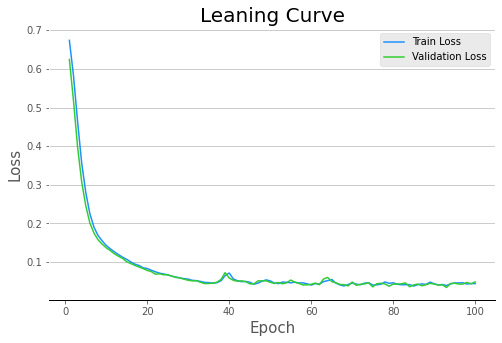

In [ ]:
# Autoencoder with MAE Loss
main(hyper_params_mae)

In [ ]:
# =========== TODO =========== #
hyper_params_huber = {
    'input_size' : 30,
    'encoder_hidden_size' : [45],
    'bottle_neck_size' : 60,
    'decoder_hidden_size' : [45],
    'dropout_p': .2,
    'batch_size': 8192,
    'loss': 'huber',
    'n_epochs': 100,
    'verbose': 2,
    'save': './shin_result/huber_1000.pth',
    'early_stop' : 80,
    'evaluate' : False
}

hyper_params_huber = argparse.Namespace(**hyper_params_huber)

*** Training ***: 100%|██████████| 100/100 [01:10<00:00,  1.43it/s, Epoch=100, Loss=0.00044, Val_Loss=0.00078, f1=0.917]


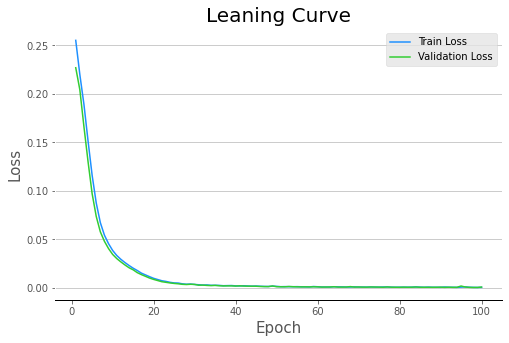

In [ ]:
# Autoencoder with Huber Loss
model_huber = main(hyper_params_huber)

In [ ]:
model, hyper = load_model('./shin_result/huber_1000.pth')

##### cos

In [ ]:
model_huber.to(torch.device('cuda'))

cos = nn.CosineSimilarity(dim = -1)
cs = []
model_huber.eval()
with torch.no_grad():
    for sample_idx in range(0, len(X_valid), 1024):
        sample = torch.Tensor(X_valid[sample_idx : sample_idx + 1024]).to(torch.device('cuda'))

        x_hat = model_huber(sample)
        c = cos(sample, x_hat)
        cs.extend(c.tolist())



In [ ]:
cs

[0.9998019337654114,
 0.9997814297676086,
 0.9992789030075073,
 0.9997525215148926,
 0.9991892576217651,
 0.9997116327285767,
 0.9996979832649231,
 0.9996452927589417,
 0.9997568726539612,
 0.9993192553520203,
 0.9988744258880615,
 0.999800980091095,
 0.9997241497039795,
 0.9994980692863464,
 0.9996444582939148,
 0.999714732170105,
 0.9996614456176758,
 0.99944007396698,
 0.9996851682662964,
 0.9994559288024902,
 0.9995133876800537,
 0.9995801448822021,
 0.9994258880615234,
 0.9997450113296509,
 0.9997372031211853,
 0.998907744884491,
 0.9995757937431335,
 0.9994628429412842,
 0.999558687210083,
 0.9996362328529358,
 0.9996513724327087,
 0.9995102882385254,
 0.9997230172157288,
 0.9994336366653442,
 0.9996392130851746,
 0.9994733333587646,
 0.9994387030601501,
 0.9995012283325195,
 0.9992386698722839,
 0.9997207522392273,
 0.9996722936630249,
 0.9996528625488281,
 0.9942821264266968,
 0.9997022747993469,
 0.9992395043373108,
 0.9987998604774475,
 0.9996364712715149,
 0.9998085498809814

In [ ]:
best_thres = None
best_score = -np.inf
for thres in np.arange(0, 1, 0.001):
    pred = np.where(np.array(cs) > thres, 0, 1)
    score = f1_score(y_valid, pred, average = 'macro')

    if best_score < score:
        best_thres = thres
        best_score = score

In [ ]:
best_thres

0.9390000000000001

In [ ]:
best_score

0.9165787375726882

In [ ]:
def predict_test(model, test, thres):
    cos = nn.CosineSimilarity(dim = -1)
    model.to(torch.device('cuda'))

    cos_sims = []
    with torch.no_grad():
        for batch_idx in range(0, len(test), 1024):
            batch = torch.Tensor(test[batch_idx : batch_idx + 1024]).to(torch.device('cuda'))

            x_hat = model_huber(batch)
            cos_sim = cos(batch, x_hat)
            cos_sims.extend(cos_sim.tolist())
    
    pred = np.where(np.array(cos_sims) > thres, 0, 1)
    
    return cos_sims, pred

In [ ]:
cos_sims, pred_test = predict_test(model_huber, X_test, best_thres)

In [ ]:
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred_test.shape

(142503,)

In [ ]:
submission = pd.read_csv('./data/sample_submission.csv')

In [ ]:
submission.shape

(142503, 2)

In [ ]:
submission['Class'] = pred_test
submission

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0
...,...,...
142498,0x4587f,0
142499,0x45880,0
142500,0x45884,0
142501,0x45885,0


In [ ]:
submission.to_csv('sub_huber.csv', index = False)

##### recon

In [ ]:
recon_error

array([0.00130591, 0.00142208, 0.00103035, ..., 0.00201371, 0.00058524,
       0.00174391])

(array([7.030e+02, 6.235e+03, 8.707e+03, 7.290e+03, 3.190e+03, 1.247e+03,
        5.770e+02, 2.650e+02, 1.270e+02, 5.000e+01, 1.600e+01, 1.500e+01,
        7.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.300e+01]),
 array([-8.15089078, -7.56344996, -6.97600914, -6.38856832, -5.80112749,
        -5.21368667, -4.62624585, -4.03880503, -3.4513642 , -2.86392338,
        -2.27648256, -1.68904174, -1.10160092, -0.51416009,  0.07328073,
         0.66072155,  1.24816237,  1.8356032 ,  2.42304402,  3.01048484,
         3.59792566]),
 <a list of 20 Patch objects>)

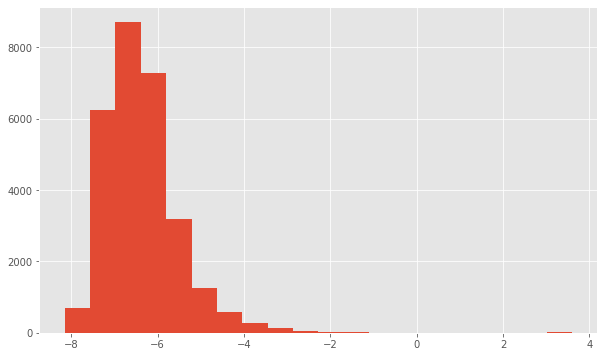

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(np.log(recon_error), bins = 20)


In [ ]:
best_thres = None
best_score = -np.inf
for thres in np.arange(-5, 0, 0.01):
    pred = np.where(np.log(recon_error) > thres, 0, 1)
    score = f1_score(y_valid, pred, average = 'macro')

    if best_score < score:
        best_thres = thres
        best_score = score

In [ ]:
best_score

0.05644870959000227

In [ ]:
best_score

In [ ]:
# =========== TODO =========== #
hyper_params_huber = {
    'input_size' : 30,
    'encoder_hidden_size' : [25, 20, 15, 10],
    'bottle_neck_size' : 5,
    'decoder_hidden_size' : [10, 15, 20, 25],
    'dropout_p': .2,
    'batch_size': 1024,
    'loss': 'huber',
    'n_epochs': 1000,
    'verbose': 2,
    'save': './shin_result/huber_1000.pth',
    'early_stop' : 200,
    'evaluate' : True
}

hyper_params_huber = argparse.Namespace(**hyper_params_huber)

In [ ]:
# Autoencoder with Huber Loss
main(hyper_params_huber)

##### Evaluate

In [ ]:
def load_model(save_file):
    save_file = torch.load(save_file,
                           map_location = 'cuda' if torch.cuda.is_available() else 'cpu')
    
    train_hyper_params = save_file['hyper_params']
    
    model = AutoEncoder(
        input_size = 30,
        encoder_hidden_size = train_hyper_params.encoder_hidden_size,
        bottle_neck_size = train_hyper_params.bottle_neck_size,
        decoder_hidden_size = train_hyper_params.decoder_hidden_size,
        dropout_p = train_hyper_params.dropout_p
    )
    model.load_state_dict(save_file['model'])

    return model, train_hyper_params

def cos_sim(y, y_hat):
    sim = torch.dot(y, y_hat) / (torch.norm(y) * torch.norm(y_hat) + 1e-6)

    return sim

def evaluate(save_file, X_valid, y_valid = None, threshold = .5, metric = 'recon_error'):
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model, train_hyper_params = load_model(save_file)
    model.to(DEVICE)
    model.eval()

    if metric == 'recon_error':
        M = nn.MSELoss()
    elif metric == 'cos':
        M = cos_sim   

    scores = []
    with torch.no_grad():
        for sample in X_valid:
            sample = torch.FloatTensor(sample).to(DEVICE)

            # feed forward
            x_hat = model(sample.view(1, -1))

            # metric(Cosine Similarity or Reconstruction Error)
            score = M(sample, x_hat)
            scores.append(float(score))
    
    if metric == 'recon_error':
        pred = np.where(np.log(np.array(scores)) > threshold, 1, 0)
    elif metric == 'cos':
        pred = np.where(np.array(scores) < threshold, 1, 0)

    f1 = None
    if y_valid is not None:
        f1 = f1_score(y_valid, pred, average = 'macro')
        
    return pred, f1

In [ ]:
pred, f1 = evaluate('./shin_result/mae_1000.pth', X_valid, y_valid, threshold = 1, metric = 'recon_error')

ValueError: ignored

In [ ]:
f1

0.5805561734949161

In [ ]:
def threshold_search(save_file, X_valid, y_valid, thresholds, metric = 'recon_error'):
    best_f1 = -np.inf
    best_thres = None
    with tqdm(thresholds, desc = '*** Seaching Threshold ***') as pbar:
        for thres in thresholds:
            pred, f1 = evaluate(save_file, X_valid, y_valid, threshold = thres, metric = metric)

            if f1 > best_f1:
                best_f1 = f1
                best_thres = thres

            pbar.set_postfix({
                'threshold': thres,
                'f1_score': f1
            })

    best_pred, best_f1 = evaluate(save_file, X_valid, y_valid, threshold = best_thres, metric = metric)

    return best_pred, best_f1, best_thres

In [ ]:
thresholds = np.arange(-2, 2, 0.2)

pred, f1, thres = threshold_search('./shin_result/mae_1000.pth', X_valid, y_valid, thresholds = thresholds, metric = 'recon_error')

*** Seaching Threshold ***:   0%|          | 0/20 [00:05<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
thresholds = np.arange(0.8, 1, 0.025)

cos_pred, cos_f1, cos_thres = threshold_search('./shin_result/mae_1000.pth', X_valid, y_valid, thresholds = thresholds, metric = 'cos')

*** Seaching Threshold ***:   0%|          | 0/8 [01:07<?, ?it/s, threshold=0.825, f1_score=0.271]


KeyboardInterrupt: ignored

In [ ]:
def asdf(x = 1):
    return x

a = asdf

In [ ]:
a()

1

In [ ]:
a = torch.zeros((2, 3))
b = torch.ones((2, 3))

cos = nn.CosineSimilarity(dim = 1)

print(a)
print(b)
cos(a, b)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


tensor([0., 0.])

In [ ]:
torch.cat([torch.Tensor([1, 2]), torch.Tensor([3, 4])])

tensor([1., 2., 3., 4.])

##### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, confusion_matrix

IF = IsolationForest(n_estimators = 300, max_samples = 256, contamination = .003,  bootstrap = True)
IF.fit(train.values)

IsolationForest(bootstrap=True, contamination=0.003, max_samples=256,
                n_estimators=300)

In [ ]:
def IsolationGridSearch(X_train, X_valid, y_valid,
                        n_estimators, contamination,
                        bootstrap):
    best_score = -np.inf
    best_model = None

    grid = product(n_estimators, contamination, bootstrap)
    for n, c, b in grid:
        model = IsolationForest(
            n_estimators = n,
            max_samples = 256,
            contamination = c,
            bootstrap = b,
            random_state = 42,
            n_jobs = -1
        )
        model.fit(X_train)
        pred = model.predict(X_valid)
        pred = np.where(pred == 1, 0, 1)
        macro_f1 = f1_score(y_valid, pred, average = 'macro')

        if macro_f1 > best_score:
            best_score = macro_f1
            best_model = model

            print('=== Best Score updated into {} ==='.format(np.round(best_score, 5)))

    print('=========================')   
    print('= Best Score: {} ='.format(np.round(best_score, 5)))
    print('=========================')
    
    return best_model

In [ ]:
# ====== TODO ====== #
n_estimators = [100]
contamination = np.arange(0.0001, 0.0031, 0.0005)
bootstrap = [True, False]
# ================== #

best_model = IsolationGridSearch(X_train, X_valid, y_valid,
                                             n_estimators, contamination, bootstrap)

=== Best Score updated into 0.49974 ===
=== Best Score updated into 0.67752 ===
= Best Score: 0.67752 =


In [ ]:
best_model

IsolationForest(bootstrap=True, contamination=0.0006000000000000001,
                max_samples=256, n_jobs=-1, random_state=42)

In [ ]:
anomaly_score = best_model.decision_function(X_valid)

In [ ]:
max(anomaly_score)

0.34301412669189546

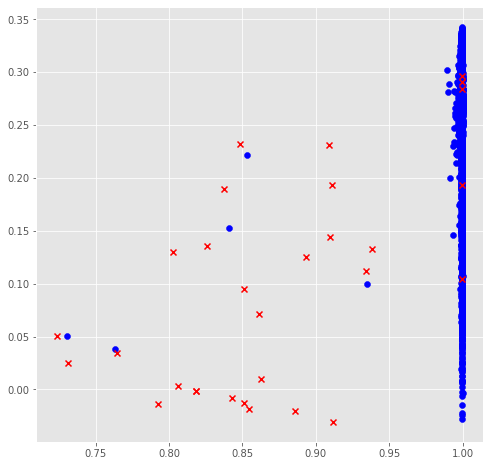

In [ ]:
plt.figure(figsize = (8, 8))
anomaly_mask = (y_valid == 1)
normal_mask = (y_valid == 0)
plt.scatter(np.array(cs)[normal_mask], anomaly_score[normal_mask], marker = 'o', color = 'b')
plt.scatter(np.array(cs)[anomaly_mask], anomaly_score[anomaly_mask], marker = 'x', color = 'r')

In [ ]:
normal_mask

array([ True,  True,  True, ...,  True,  True,  True])

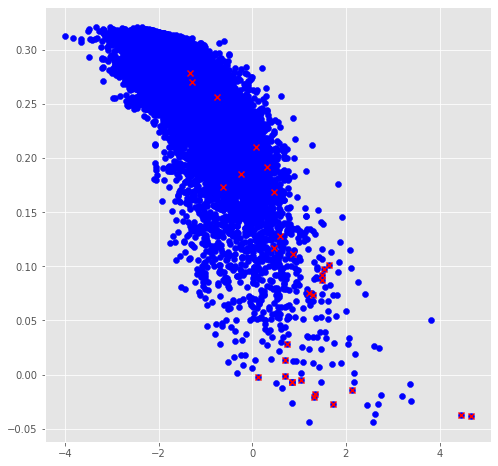

In [ ]:
plt.figure(figsize = (8, 8))
anomaly_mask = (y_valid.values == 1)
plt.scatter(np.log(recon_errors), anomaly_score, marker = 'o', color = 'b')
plt.scatter(np.log(recon_errors[anomaly_mask]), anomaly_score[anomaly_mask], marker = 'x', color = 'r')

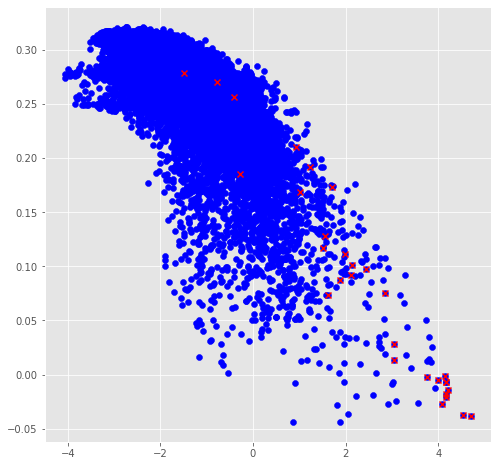

In [ ]:
plt.figure(figsize = (8, 8))
anomaly_mask = (y_valid.values == 1)
plt.scatter(np.log(recon_error_mae), anomaly_score, marker = 'o', color = 'b')
plt.scatter(np.log(recon_error_mae[anomaly_mask]), anomaly_score[anomaly_mask], marker = 'x', color = 'r')

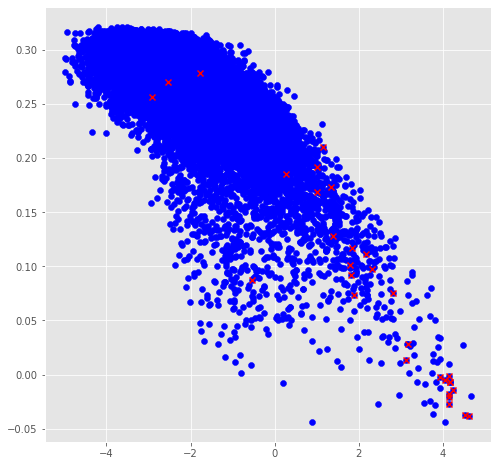

In [ ]:
plt.figure(figsize = (8, 8))
anomaly_mask = (y_valid.values == 1)
plt.scatter(np.log(recon_error_huber), anomaly_score, marker = 'o', color = 'b')
plt.scatter(np.log(recon_error_huber[anomaly_mask]), anomaly_score[anomaly_mask], marker = 'x', color = 'r')

In [ ]:
from sklearn.covariance import EllipticEnvelope

model_b = EllipticEnvelope(support_fraction = 0.994, contamination = 0.001, random_state = 42)
model_b.fit(X_train)

EllipticEnvelope(contamination=0.001, random_state=42, support_fraction=0.994)

In [ ]:
b = model_b.score_samples(X_valid)

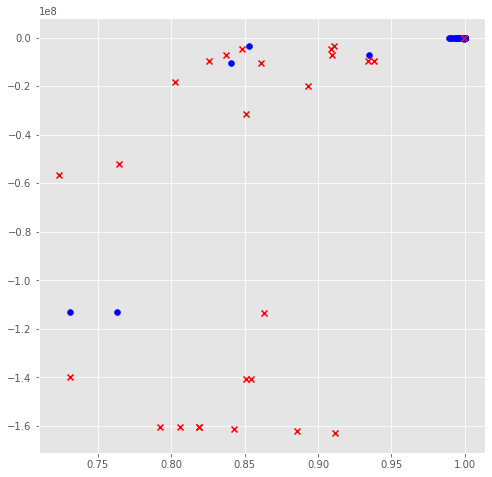

In [ ]:
plt.figure(figsize = (8, 8))
anomaly_mask = (y_valid == 1)
normal_mask = (y_valid == 0)
plt.scatter(np.array(cs)[normal_mask], b[normal_mask], marker = 'o', color = 'b')
plt.scatter(np.array(cs)[anomaly_mask], b[anomaly_mask], marker = 'x', color = 'r')

In [ ]:
thres1 = None
thres2 = None
best_f1 = -np.inf
for thres1_candidate, thres2_candidate in product(np.arange(0.9, 1.01, 0.01), np.arange(-10000000, -1000000, 1000)):
    AE_pred = (cs < thres1_candidate)
    EE_pred = (b < thres2_candidate)
    ensemble_pred = AE_pred & EE_pred

    f1 = f1_score(y_valid, ensemble_pred, average = 'macro')

    if f1 > best_f1:
        
        best_f1 = f1
        thres1 = thres1_candidate
        thres2 = thres2_candidate
        print('updated')
        print(thres1)
        print(thres2)

updated
0.9
-10000000
updated
0.9
-9473000
updated
0.9
-6996000
updated
0.9
-4720000
updated
0.91
-4726000
updated
0.91
-4720000
updated
0.92
-4720000
updated
0.92
-3543000
updated
0.9400000000000001
-4720000
updated
0.9400000000000001
-3543000


In [ ]:
thres1

0.9400000000000001

In [ ]:
thres2

-3543000

0.9400000000000002

In [ ]:
print(thres2)

None


In [ ]:
len(list(product(np.arange(0.8, 1.01, 0.01), np.arange(-1000000, 0, 500))))

42000

In [ ]:
best_f1

0.9165787375726882

In [ ]:
pred_b = np.where(np.array(b) > -10000000, 0, 1)

In [ ]:
f1_score(y_valid, pred_b, average = 'macro')

0.755629357577611

In [ ]:
aa = np.array([0, 0, 1, 0])
bb = np.array([0, 1, 1, 0])

In [ ]:
aa & bb

array([0, 0, 1, 0])

In [ ]:
cos_sims, pred_test = predict_test(model_huber, X_test, thres1)

In [ ]:
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_b = model_b.score_samples(X_test)

In [ ]:
pred_test_b = (test_b < thres2)

In [ ]:
pred_test_b

array([False, False, False, ..., False, False, False])

In [ ]:
pred_ensemble = (pred_test & pred_test_b)

In [ ]:
submission['Class'] = pred_ensemble

In [ ]:
submission.to_csv('sub_ensemble.csv', index = False)